<a href="https://colab.research.google.com/github/jayuan101/Airbnb-data-mining-and-Predicating-Price/blob/main/Data_Mining_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cbook import boxplot_stats  
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score, cross_val_predict
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.tree import DecisionTreeRegressor
from sklearn import ensemble
import numpy as np
import plotly.express as px 
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore")
import pickle

In [ ]:
bnb = pd.read_csv('listings.csv')

In [ ]:
bnb

,id,Names,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,SkylitMidtownCastle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,225.0,30.0,48.0,11/4/2019,0.31,3.0,308.0,0.0,NaN
1,5121,BlissArtsSpace,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60.0,30.0,50.0,12/2/2019,0.32,2.0,365.0,0.0,NaN
2,5136,SpaciousBrooklynDuplexPatioGarden,7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275.0,21.0,2.0,8/8/2021,0.02,1.0,250.0,1.0,NaN
3,5178,LargeFurnishedRoomNearBway,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68.0,2.0,536.0,5/9/2022,3.37,1.0,172.0,62.0,NaN
4,5203,CozyCleanGuestRoomFamilyApt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75.0,2.0,118.0,7/21/2017,0.76,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7239,10938202,Spaciousbrightlivingbedroom,2455178,Nessa,Brooklyn,Flatbush,40.63946,-73.96606,Private room,55.0,30.0,6.0,11/14/2016,0.09,1.0,0.0,0.0,NaN
7240,10835801,SpaciousLuxurybdrmonBklynWaterfront,12353168,Ali,Brooklyn,Williamsburg,40.71916,-73.96283,Entire home/apt,225.0,5.0,21.0,5/15/2021,0.39,1.0,0.0,0.0,NaN
7241,11239207,TheBlairHouseRental,33535733,Andrew,Manhattan,Midtown,40.76096,-73.96720,Private room,120.0,30.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN
7242,10939255,MasterBedroomBathroomenSuite,7501803,Hannah,Brooklyn,Flatbush,40.65193,-73.96400,Private room,55.0,30.0,3.0,10/9/2017,0.04,1.0,0.0,0.0,NaN


In [ ]:
bnb.columns

Index(['id', 'Names', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [ ]:
bnb.shape

(7244, 18)

In [ ]:
bnb.info

<bound method DataFrame.info of             id                                Names   host_id  host_name  \
0         2595                  SkylitMidtownCastle      2845   Jennifer   
1         5121                       BlissArtsSpace      7356      Garon   
2         5136    SpaciousBrooklynDuplexPatioGarden      7378    Rebecca   
3         5178           LargeFurnishedRoomNearBway      8967   Shunichi   
4         5203          CozyCleanGuestRoomFamilyApt      7490  MaryEllen   
...        ...                                  ...       ...        ...   
7239  10938202          Spaciousbrightlivingbedroom   2455178      Nessa   
7240  10835801  SpaciousLuxurybdrmonBklynWaterfront  12353168        Ali   
7241  11239207                  TheBlairHouseRental  33535733     Andrew   
7242  10939255         MasterBedroomBathroomenSuite   7501803     Hannah   
7243  10939344              hugesunnybedTimesSquare    914838       Lior   

     neighbourhood_group       neighbourhood  latitude 

In [ ]:
bnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,7.244000e+03,7.244000e+03,7244.000000,7244.000000,7243.000000,7243.000000,7243.000000,6049.000000,7243.000000,7243.000000,7243.000000,0.0
mean,5.253154e+06,1.604804e+07,40.729841,-73.957874,166.380229,26.039486,45.620047,0.602278,2.617286,80.647108,4.206820,NaN
std,3.336519e+06,1.637255e+07,0.052852,0.037901,283.111828,35.697819,78.553259,0.897512,8.678007,119.509416,11.202809,NaN
min,2.595000e+03,2.571000e+03,40.508630,-74.241350,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,2.135291e+06,2.966450e+06,40.688767,-73.983270,76.000000,7.000000,1.000000,0.050000,1.000000,0.000000,0.000000,NaN
50%,5.195190e+06,1.026437e+07,40.724200,-73.958255,120.000000,30.000000,10.000000,0.200000,1.000000,0.000000,0.000000,NaN
75%,8.222281e+06,2.486176e+07,40.764763,-73.942653,185.000000,30.000000,52.000000,0.790000,1.000000,163.000000,2.000000,NaN
max,1.123921e+07,3.043856e+08,40.897110,-73.712990,9999.000000,1250.000000,674.000000,10.560000,189.000000,365.000000,124.000000,NaN


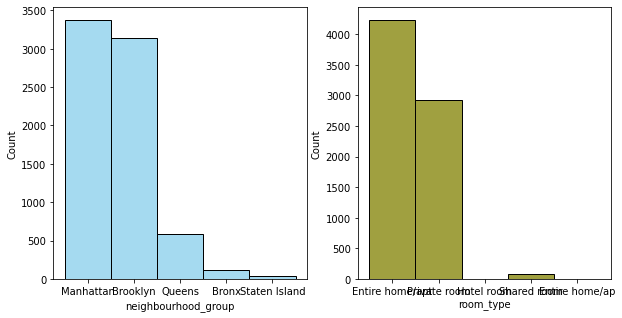

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.histplot(bnb['neighbourhood_group'] , color="skyblue",ax=axes[0])
sns.histplot(bnb['room_type'] , color="olive",ax=axes[1])
plt.show()

In [ ]:
#Finding the outlier values in the price column
outlier_list = boxplot_stats(bnb.price).pop(0)['fliers'].tolist()
print(outlier_list)

[]


In [ ]:
#Finding the number of rows containing outliers
outlier_neighbourhood_rows = bnb[bnb.neighbourhood.isin(outlier_list)].shape[0]
print("Number of rows contaning outliers in neighbourhood : ", outlier_neighbourhood_rows)

Number of rows contaning outliers in neighbourhood :  0


In [ ]:
#Percentage of rows which are outliers
percent_neighbourhood_outlier = (outlier_neighbourhood_rows/bnb.shape[0])*100
print("Percentage of outliers in neighbourhood columns : ", percent_neighbourhood_outlier)

Percentage of outliers in neighbourhood columns :  0.0


In [ ]:
#Finding the number of rows containing outliers
outlier_neighbourhood_group_rows = bnb[bnb.neighbourhood_group.isin(outlier_list)].shape[0]
print("Number of rows contaning outliers in neighbourhood_group : ", outlier_neighbourhood_group_rows)

Number of rows contaning outliers in neighbourhood_group :  0


In [ ]:
#Percentage of rows which are outliers
percent_neighbourhood_group_outlier = (outlier_neighbourhood_group_rows/bnb.shape[0])*100
print("Percentage of outliers in neighbourhood_group columns : ", percent_neighbourhood_group_outlier)

Percentage of outliers in neighbourhood_group columns :  0.0


In [ ]:
px.histogram(
    data_frame=bnb,
    x="neighbourhood_group",
    nbins=60, # 10 width per each bin since range is from 0-600k
    marginal="box",
    title = "neighbourhood_group",
)

In [ ]:
px.histogram(
    data_frame=bnb,
    x="neighbourhood",
    nbins=60, # 10 width per each bin since range is from 0-600k
    marginal="box",
    title = "neighbourhood",
)

In [ ]:
#EN = Entry Level. SE = Senior. MI = Mid Level. EX = Executive-level / Director
px.box(
    data_frame=bnb,
    x="neighbourhood_group",
    y="neighbourhood",
    color="neighbourhood_group",
    title = "Experience Vs Salary",
)

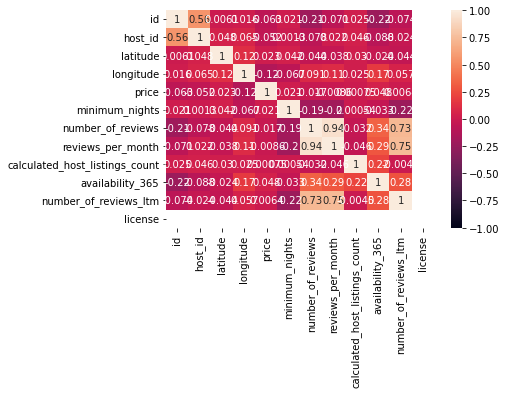

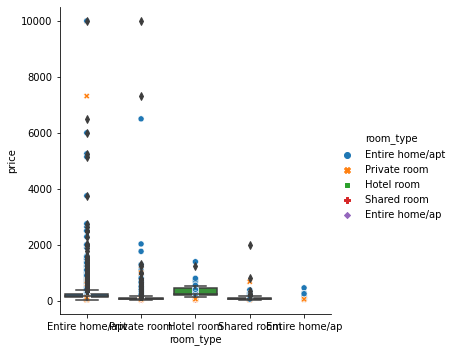

In [ ]:
heatmap = sns.heatmap(bnb.corr(), vmin=-1, vmax=1, annot=True)
sns.relplot(x="neighbourhood_group", y="price",hue="room_type", style = "room_type", data=bnb);
sns.boxplot(x="room_type", y="price", data=bnb)

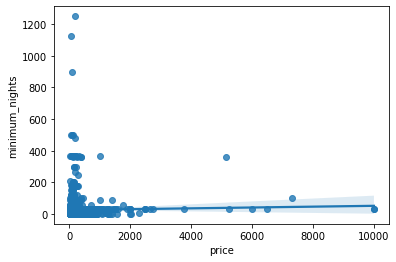

In [ ]:
sns.regplot(x="price", y="minimum_nights", data=bnb,fit_reg= True)
plt.show()

In [ ]:
from statsmodels.formula.api import ols
m = ols('price ~ minimum_nights',bnb).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.224
Date:                Thu, 25 Aug 2022   Prob (F-statistic):             0.0726
Time:                        16:08:16   Log-Likelihood:                -51168.
No. Observations:                7243   AIC:                         1.023e+05
Df Residuals:                    7241   BIC:                         1.024e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        162.0237      4.117     39.

In [ ]:
m = ols('price ~ minimum_nights + neighbourhood_group + neighbourhood + room_type + reviews_per_month + number_of_reviews',bnb).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     2.827
Date:                Thu, 25 Aug 2022   Prob (F-statistic):           9.85e-30
Time:                        16:08:17   Log-Likelihood:                -42102.
No. Observations:                6049   AIC:                         8.455e+04
Df Residuals:                    5878   BIC:                         8.569e+04
Df Model:                         170                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [ ]:
X = bnb.drop('neighbourhood_group',axis=1)
y = bnb['neighbourhood_group']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Spot Check Algorithms
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))

In [ ]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LDA: nan (nan)
NB: nan (nan)


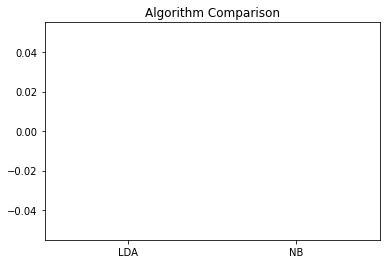

In [ ]:
from matplotlib import pyplot
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()